## Prediction of Sepsis in ICU Patients

The CRISP-DM (Cross Industry Standard Process for Data Mining) framework is a robust methodology for carrying out data mining projects. It is comprised of six major phases:

* Business Understanding
* Data Understanding
* Data Preparation
* Modeling
* Evaluation
* Deployment

### Business Understanding

**Objective:**
To predict whether a patient in the ICU will develop sepsis based on various medical attributes. Sepsis is a serious medical condition, and early prediction can significantly improve patient outcomes by enabling timely intervention and treatment.

**Business Goals:**

* **Improve Patient Outcomes:** By predicting the likelihood of sepsis, medical staff can take preventive measures to treat patients more effectively and reduce mortality rates.
* **Optimize Resource Allocation:** Early prediction of sepsis can help in better allocation of medical resources, ensuring that high-risk patients receive immediate attention.
* **Cost Reduction:** Preventing sepsis can significantly reduce healthcare costs associated with prolonged ICU stays, complex treatments, and post-sepsis complications.



### Primary Medical Attributes Contributing to Sepsis Development
- Vital signs (e.g., blood pressure, heart rate)
- Laboratory results indicating infection or organ dysfunction
- Patient demographics and medical history

### Predicting Sepsis in ICU Patients
- How accurately can we predict sepsis using the given dataset?
- What impact do missing values have on the prediction model, and how can they be managed?

### Success Criteria
1. **Model Accuracy**
   - Achieve high accuracy, sensitivity, and specificity in predicting sepsis.
2. **Timely Predictions**
   - Ensure predictions are made early enough to allow for effective intervention.
3. **Practical Implementation**
   - Ensure the model is easy to integrate into existing hospital systems and workflows.




In [49]:
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn import set_config
import joblib
from imblearn.over_sampling import RandomOverSampler

from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis

In [50]:
df = pd.read_csv("../datasets/Paitients_Files_Train.csv")
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [51]:
test_df = pd.read_csv("../datasets/Paitients_Files_Test.csv")
test_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0




Columns Description (Common to Both Datasets):

- ID: A unique identifier for each patient.
- PRG: Number of pregnancies (applicable only to females).
- PL: Plasma glucose concentration.
- PR: Diastolic blood pressure.
- SK: Triceps skinfold thickness.
- TS: 2-hour serum insulin.
- M11: Body mass index (BMI).
- BD2: Diabetes pedigree function.
- Age: Age of the patient.
- Insurance: Whether the patient has insurance coverage (1 for Yes, 0 for No). 
Sepsis (Only in Test Dataset): The target variable indicating the presence or absence of sepsis (Positive for presence, Negative for absence).

Both datasets contain patient-related information, with the test dataset having an additional "Sepsis" column for target classification. The dataset is designed for model training, while the test dataset will be used for model evaluation.

**Key Questions:**

i. Are there any correlations or patterns between the numerical features (e.g., PRG, PL, PR, SK, TS, M11, BD2, Age) and the presence of sepsis (Positive/Negative)?

ii. How does the distribution of key numerical variables (e.g., PR, SK, TS, M11) differ between patients with and without sepsis?

iii. Is there a relationship between the number of pregnancies (PRG) and plasma glucose concentration (PL)? Does this relationship vary with the presence of sepsis?

iv. Are there any significant differences in diastolic blood pressure (PR) between patients with different triceps skinfold thickness (SK) levels?

v. Does the body mass index (M11) vary significantly with 2-hour serum insulin (TS) levels?

vi. Is there a correlation between the diabetes pedigree function (BD2) and age? How does this correlation affect the likelihood of sepsis?

vii. Are patients with insurance coverage more likely to have certain health characteristics (e.g., higher age, higher BMI) compared to those without insurance coverage?

### Hypothesis

Null Hypothesis (H0): There is no significant association between the patient's age and the likelihood of sepsis.

Alternative Hypothesis (H1): There is a significant association between the patient's age and the likelihood of sepsis.

## Exploratory Data Analysis (EDA)
### Understanding the datasets



An in-depth exploration of the datasets is presented to gain insights into the available variables,their distributions and relationships. This step will provide an initial undertanding of the datasets to identify any data quality issues that will inform the cleaning and pre-processing.

### i. Column Information of The Datasets

In [52]:
# Column information of the test dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


- There are a total of 599 entries (rows) and 11 columns, each with a specific data type.
- The 'ID' column serves as a unique identifier for each patient.
- The 'Sepssis' column contains categorical data (object) and represents the target variable indicating the presence or absence of sepsis.
- The remaining columns (PRG, PL, PR, SK, TS, M11, BD2, Age, and Insurance) contain numerical data.

In [53]:
# Column information of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


- There are a total of 169 entries (rows) and 10 columns, each with a specific data type.
- Similar to the Train dataset, the 'ID' column serves as a unique identifier for each patient.
- Unlike the Train dataset, the Test dataset does not include the 'Sepssis' column, as it is intended for evaluating sepsis predictions and doesn't contain the target variable.

### ii. Shape of The Datasets

In [54]:
# The shape of the train dataset
df.shape

(599, 11)

In [55]:
test_df.shape

(169, 10)

### iii. Summary Statistics Datasets

In [56]:
# Summary Statistics of The Train Dataset
df.describe().round(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000,599.000
mean,3.825,120.154,68.733,20.563,79.461,31.920,0.481,33.290,0.686
std,3.363,32.682,19.336,16.018,116.576,8.008,0.338,11.828,0.464
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,64.000,0.000,0.000,27.100,0.248,24.000,0.000
50%,3.000,116.000,70.000,23.000,36.000,32.000,0.383,29.000,1.000
75%,6.000,140.000,80.000,32.000,123.500,36.550,0.647,40.000,1.000
max,17.000,198.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [57]:
# Summary Statistics of The Test
test_df.describe().round(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000,169.000,169.000,169.000,169.000,169.000,169.000,169.000,169.000
mean,3.917,123.521,70.426,20.444,81.000,32.250,0.439,33.065,0.728
std,3.402,29.259,19.427,15.765,110.721,7.445,0.307,11.548,0.446
min,0.000,56.000,0.000,0.000,0.000,0.000,0.100,21.000,0.000
25%,1.000,102.000,62.000,0.000,0.000,27.600,0.223,24.000,0.000
50%,3.000,120.000,74.000,23.000,0.000,32.400,0.343,28.000,1.000
75%,6.000,141.000,80.000,32.000,135.000,36.600,0.587,42.000,1.000
max,13.000,199.000,114.000,49.000,540.000,57.300,1.698,70.000,1.000


#### i. PRG (Number of Pregnancies)

- The average number of pregnancies is approximately 3.92, suggesting that, on average, patients have had several pregnancies.
- The range of values varies from 0 (no pregnancies) to a maximum of 13 pregnancies.
- Similar to the Train dataset, the majority of patients fall within the range of 1 to 6 pregnancies.

#### ii. PL (Plasma Glucose Concentration)

- The mean plasma glucose concentration is around 123.52 mg/dL.
- The values range from a minimum of 56 mg/dL to a maximum of 199 mg/dL.
- Similar to the Train dataset, the standard deviation of 29.26 indicates some variability in glucose levels among patients.

#### iii. PR (Diastolic Blood Pressure)

- The mean diastolic blood pressure is approximately 70.43 mm Hg.
- The values range from a minimum of 0 mm Hg (which seems unusual) to a maximum of 114 mm Hg.
- Most patients have diastolic blood pressure levels within the range of 62 to 80 mm Hg.

#### iv. SK (Triceps Skinfold Thickness)

- The mean triceps skinfold thickness is around 20.44 mm.
- The values range from a minimum of 0 mm (which might indicate missing data) to a maximum of 49 mm.
- As in the Train dataset, there is notable variability in skinfold thickness among patients.

#### v. TS (2-Hour Serum Insulin)

- The mean 2-hour serum insulin level is approximately 81.00 μU/ml.
- The values have a wide range, with a minimum of 0 μU/ml and a maximum of 540 μU/ml.
- As in the Train dataset, there is significant variability in insulin levels among patients.

#### vi. M11 (Body Mass Index - BMI)

- The mean BMI is approximately 32.25, indicating that, on average, patients have a BMI in the overweight range.
- BMI values vary widely, with a minimum of 0.100 (unusually low) and a maximum of 57.30.
- The standard deviation of 7.45 suggests substantial variability in BMI among patients.

#### vii. BD2 (Diabetes Pedigree Function)

- The mean diabetes pedigree function value is 0.439, reflecting the diabetes history in family members.
- Values range from a minimum of 0.100 to a maximum of 1.698.
- Similar to the Train dataset, the spread in diabetes pedigree function values indicates varying family histories of diabetes.

#### viii. Age

- The average age of patients is approximately 33.07 years, which is similar to the Train dataset.
- Ages range from a minimum of 21 years to a maximum of 70 years.
- Most patients fall within the range of 24 to 42 years.

#### ix. Insurance

- About 72.8% of the patients have insurance coverage, based on the mean value, which is slightly higher than in the Train dataset.


### iv. Checking for Missing Values in The Datasets

In [58]:
# Check for missing values in the datasets
datasets = {'train': df, 'test': test_df}

def show_missing_values(datasets):
    for name, data in datasets.items():
        print(f"Missing values in the {name.capitalize()} dataset:")
        print(data.isnull().sum())
        print('===' * 18)
        print()

show_missing_values(datasets)

Missing values in the Train dataset:
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

Missing values in the Test dataset:
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64



Both datasets do not have any missing values

#### v. Checking for Duplicates in The Datasets

In [59]:
# Check for duplicates in the Train dataset
train_duplicates = df[df.duplicated()]

# Check for duplicates in the Test dataset
test_duplicates = test_df[test_df.duplicated()]

# Display the duplicate rows in the Train dataset, if any
if not train_duplicates.empty:
    print("Duplicate Rows in Train Dataset:")
    print(train_duplicates)
else:
    print("No Duplicate Rows in Train Dataset")

# Display the duplicate rows in the Test dataset, if any
if not test_duplicates.empty:
    print("\nDuplicate Rows in Test Dataset:")
    print(test_duplicates)
else:
    print("No Duplicate Rows in Test Dataset")

No Duplicate Rows in Train Dataset
No Duplicate Rows in Test Dataset


## Univeriate analysis
### Histogram

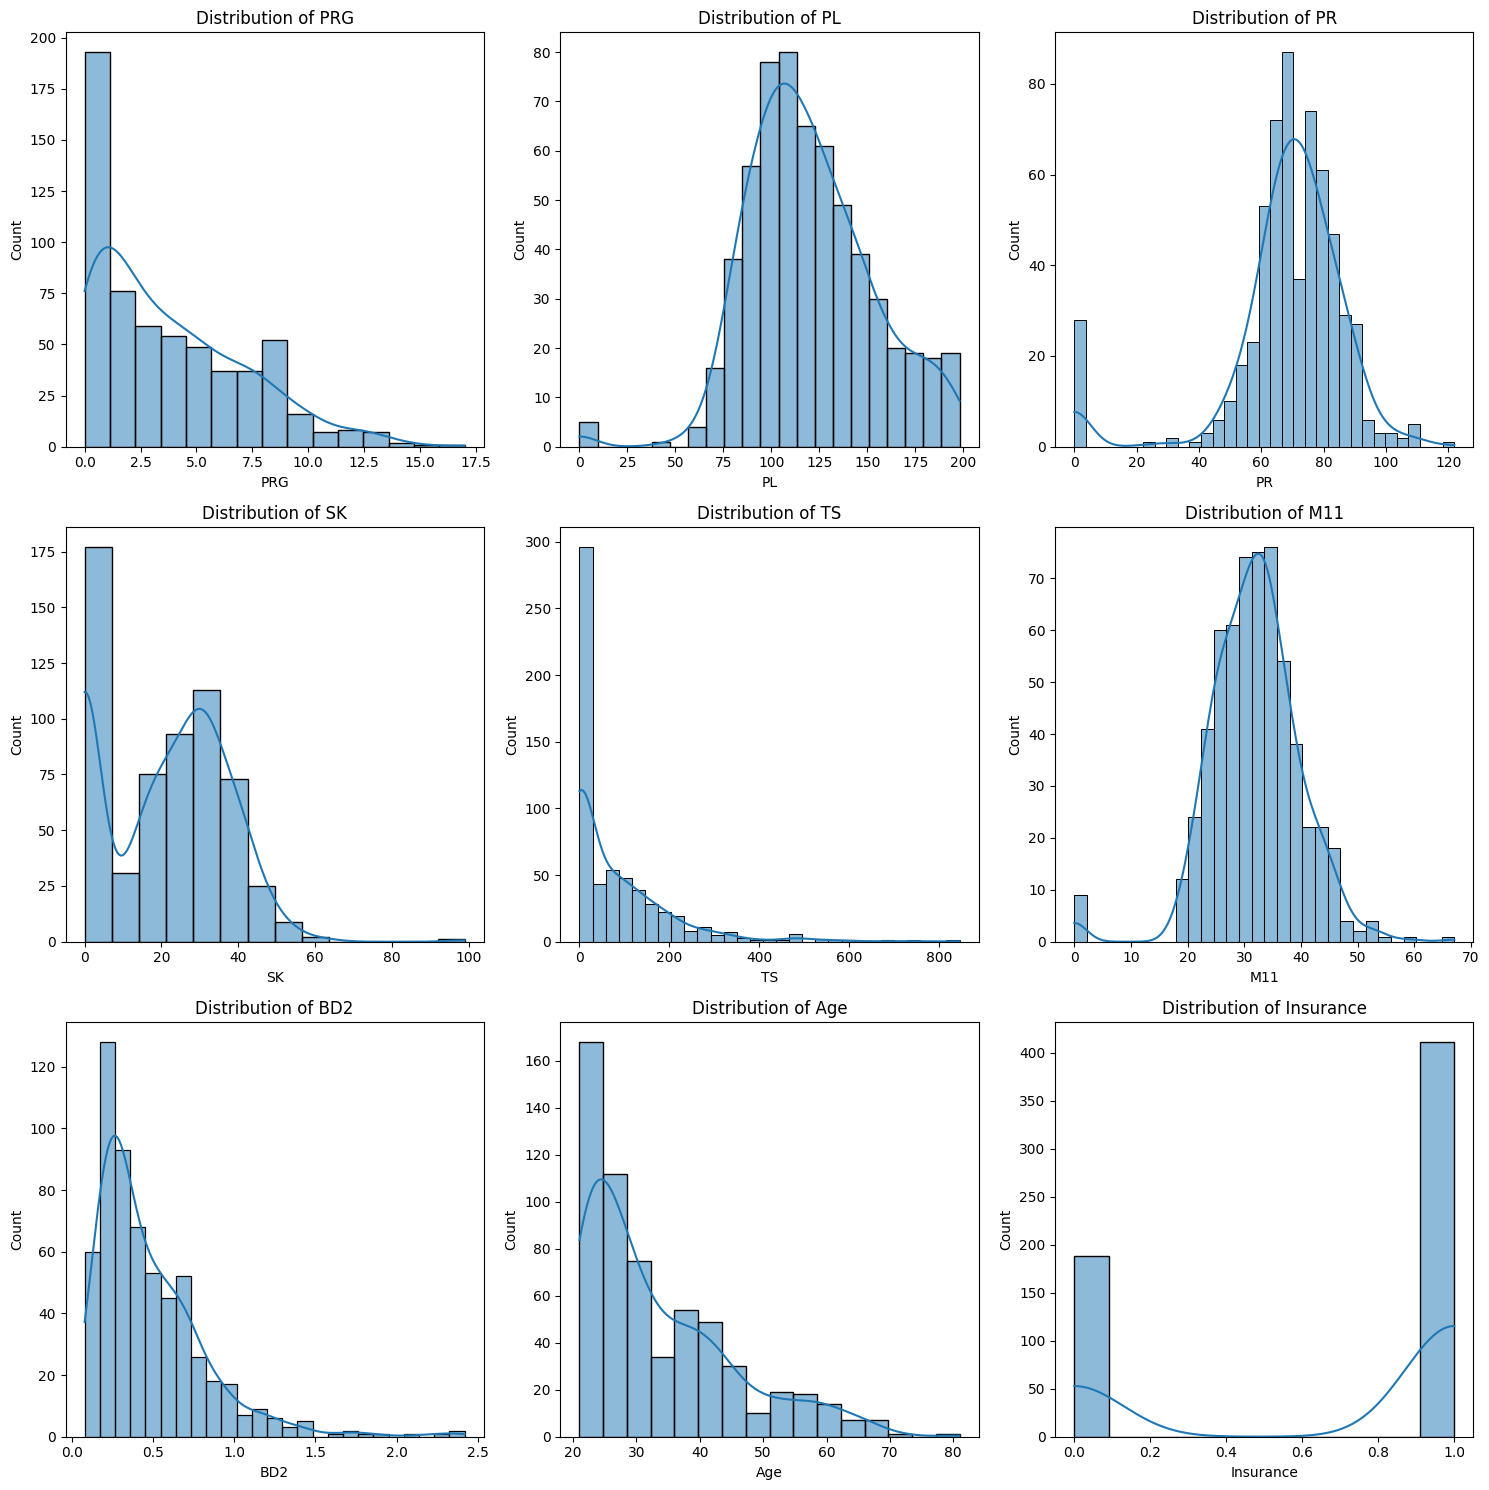

In [60]:
# Univariate Analysis
def univariate_analysis(df):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns[1:10]):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

univariate_analysis(df)

### Exploration of Categorical Features

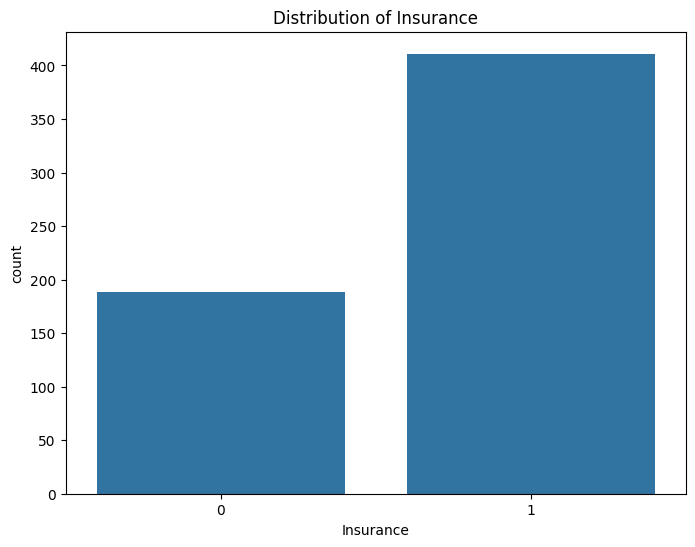

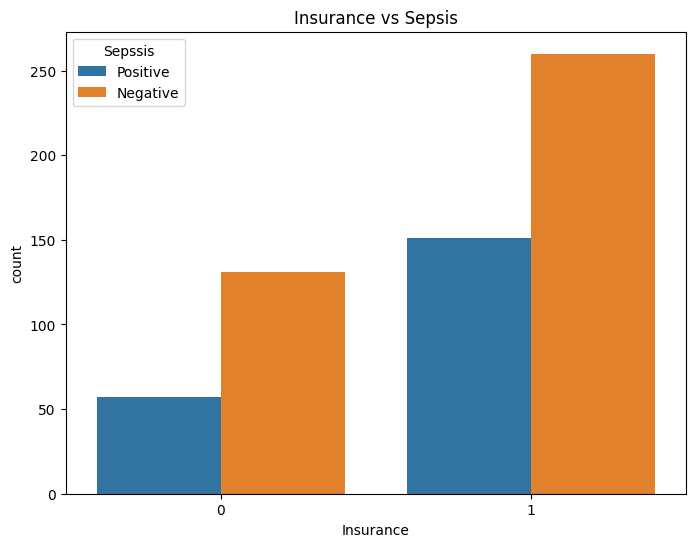

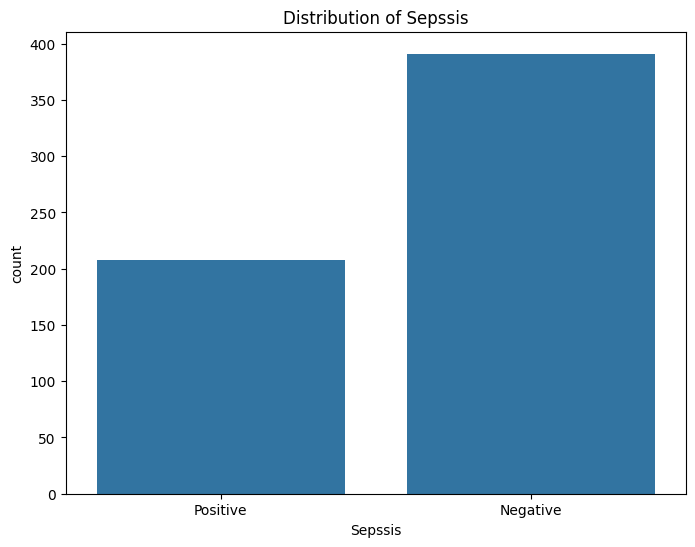

In [61]:
# Exploration of Categorical Features
def explore_categorical_features(df):
    categorical_cols = ['Insurance', 'Sepssis']

    for col in categorical_cols:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.show()
        
        if col != 'Sepssis':
            plt.figure(figsize=(8, 6))
            sns.countplot(x=col, hue='Sepssis', data=df)
            plt.title(f'{col} vs Sepsis')
            plt.show()

explore_categorical_features(df)



### Biveriate Analysis

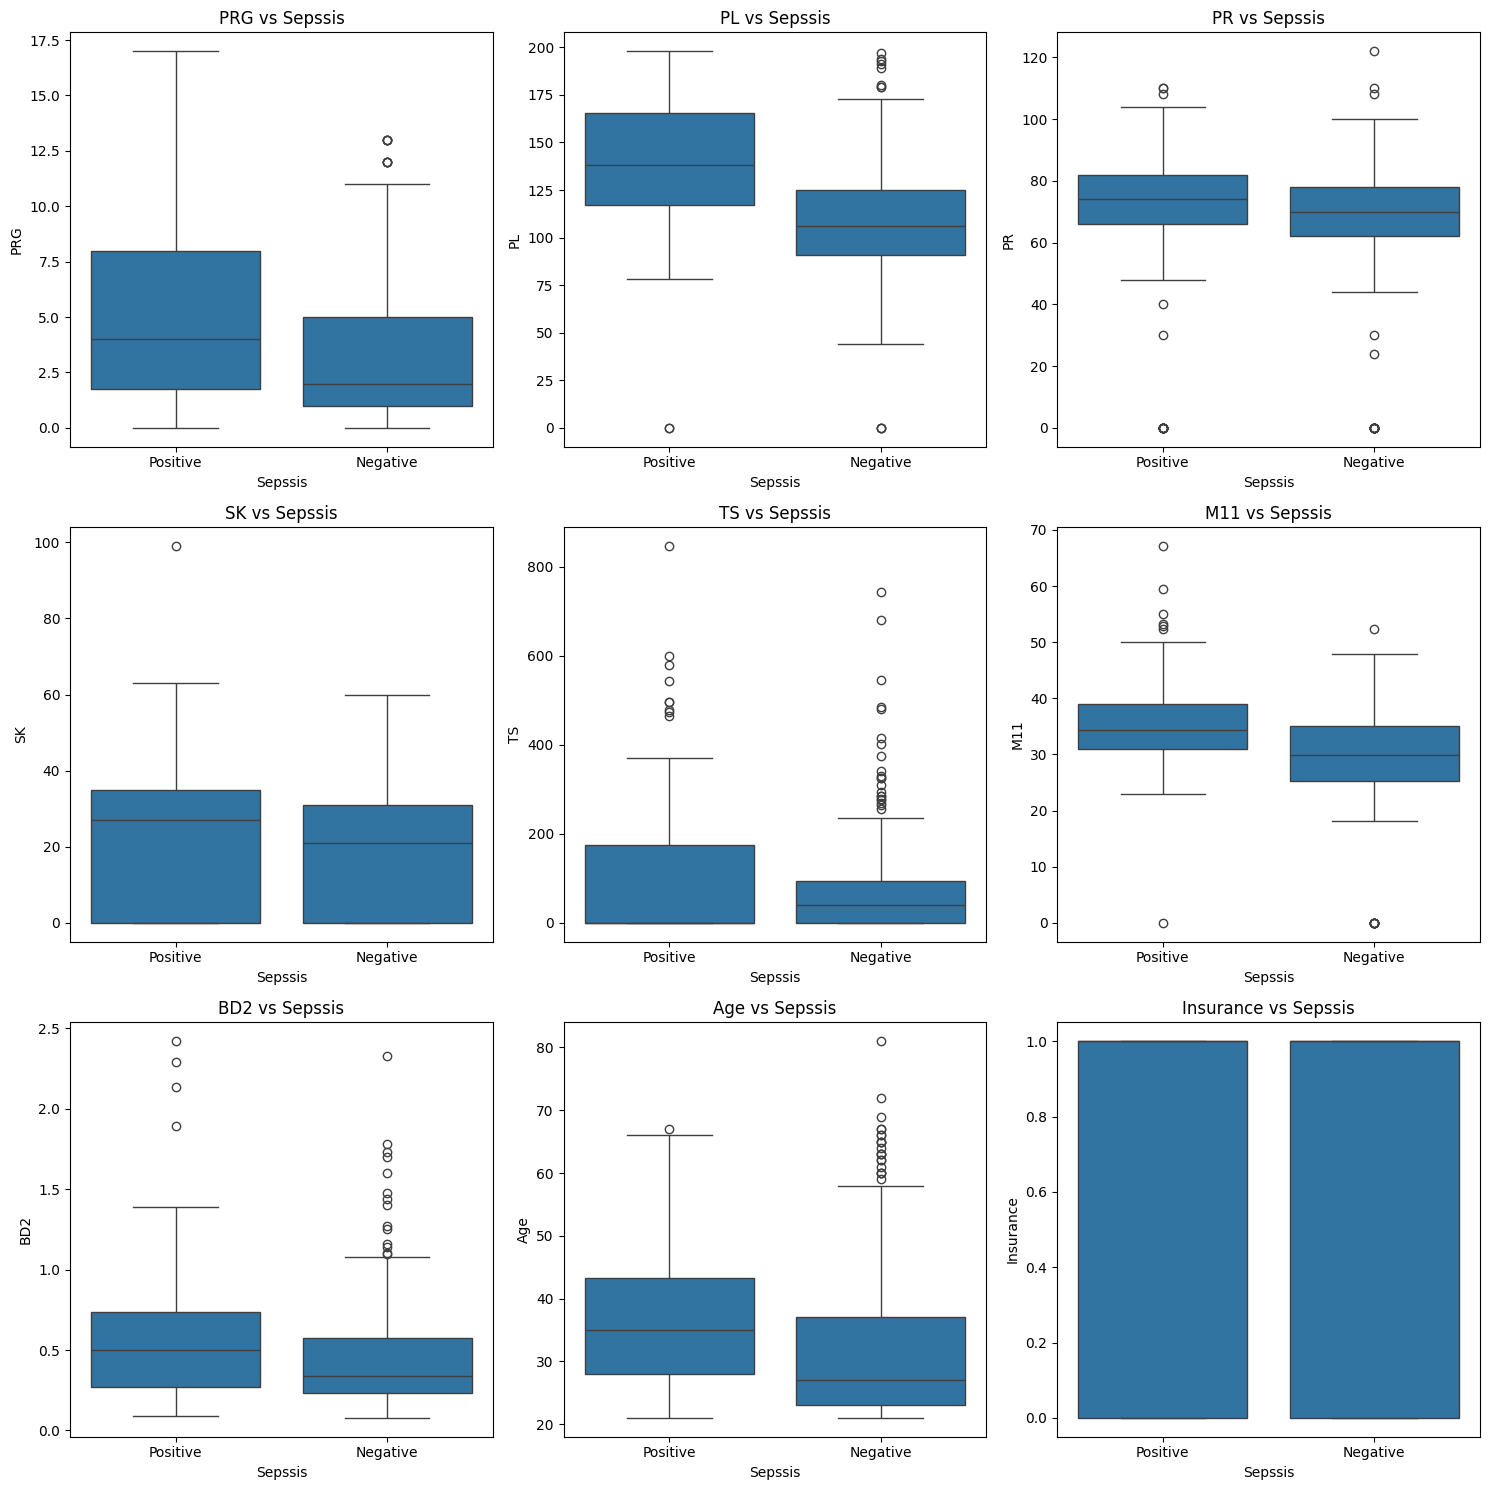

In [62]:
# Bivariate Analysis
def bivariate_analysis(df):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns[1:10]):
        if col != 'Sepssis':
            sns.boxplot(x='Sepssis', y=col, data=df, ax=axes[i])
            axes[i].set_title(f'{col} vs Sepssis')
    
    plt.tight_layout()
    plt.show()

bivariate_analysis(df)

### Multiveriate Analysis

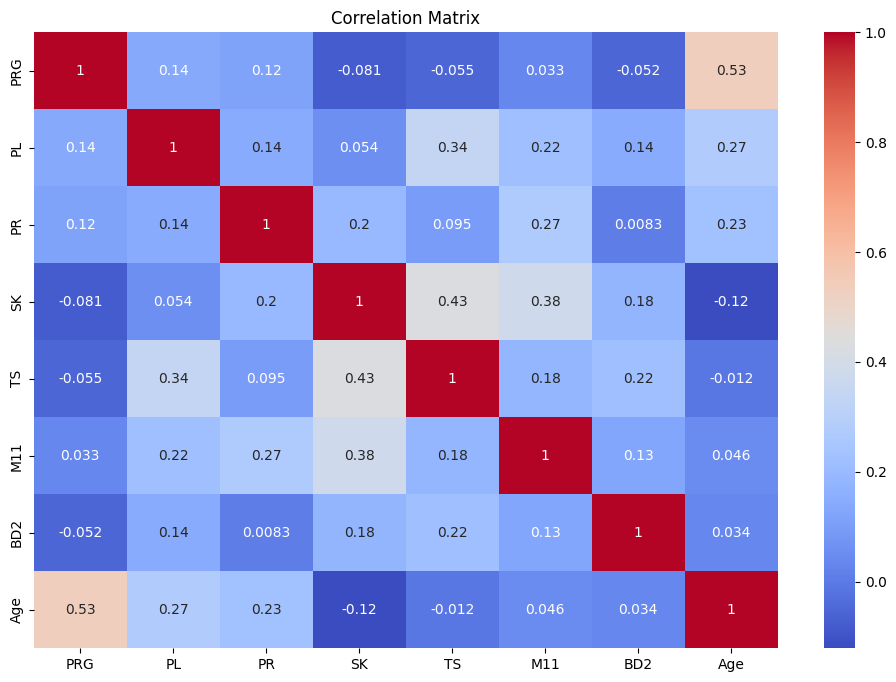

In [63]:
# Multivariate Analysis
def multivariate_analysis(df):
    numeric_df = df.drop(columns=['ID', 'Insurance','Sepssis'])
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

multivariate_analysis(df)



### Age and sepssis pairplots

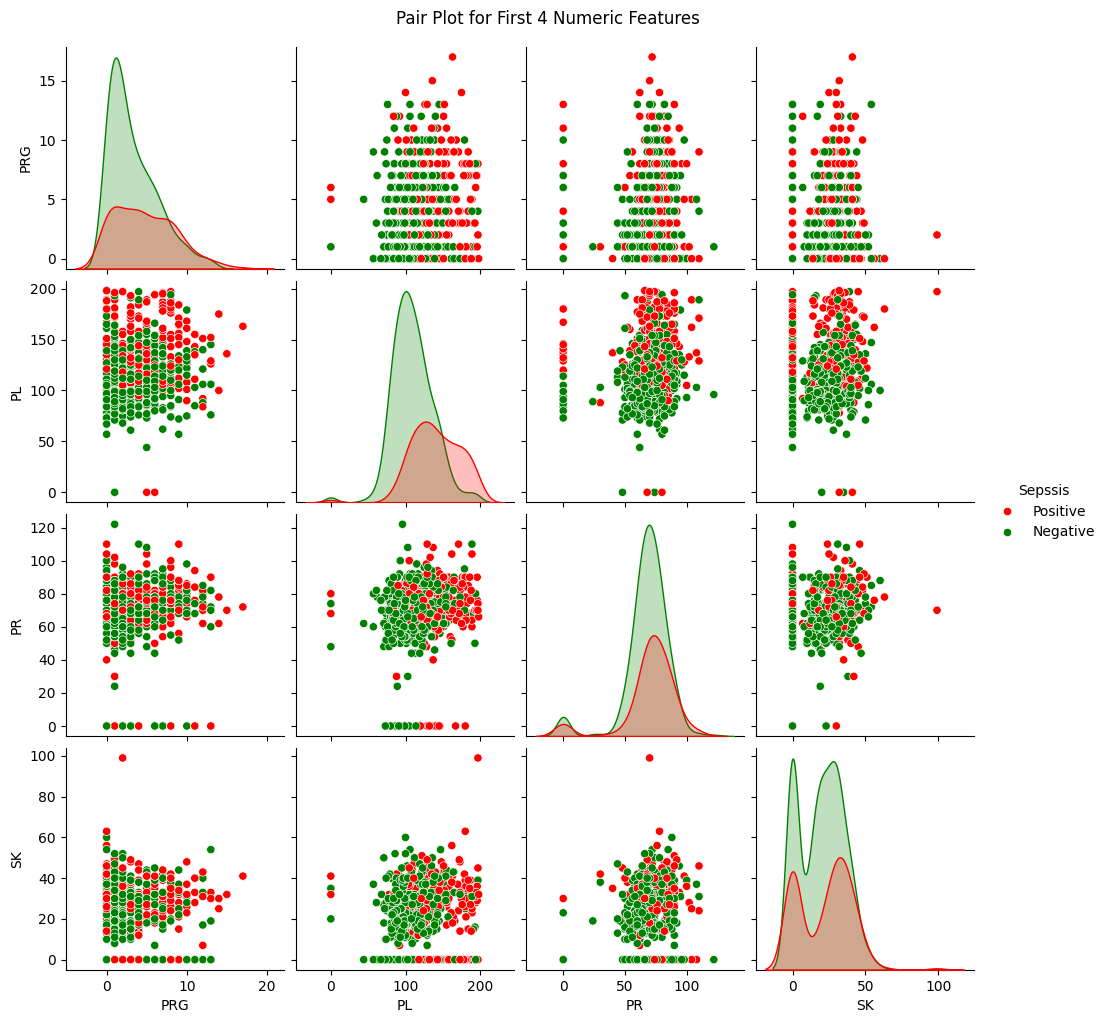

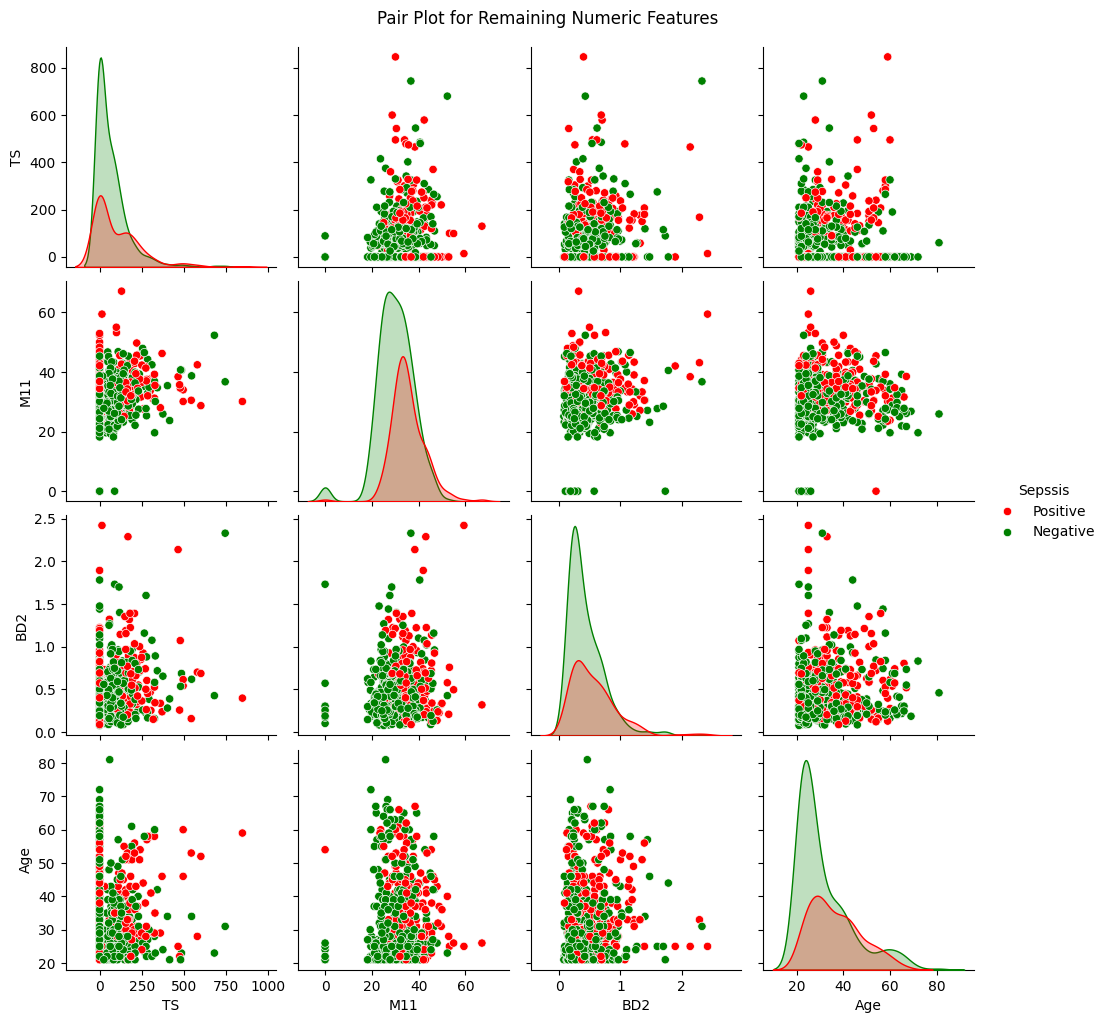

In [64]:


# Set up custom palette
palette = {'Positive': 'red', 'Negative': 'green'}

# Generate the pair plot for the first 4 numeric features
sns.pairplot(df, vars=['PRG', 'PL', 'PR', 'SK'], hue='Sepssis', palette=palette)
plt.suptitle('Pair Plot for First 4 Numeric Features', y=1.02)
plt.show()

# Generate the pair plot for the remaining numeric features
sns.pairplot(df, vars=['TS', 'M11', 'BD2', 'Age'], hue='Sepssis', palette=palette)
plt.suptitle('Pair Plot for Remaining Numeric Features', y=1.02)
plt.show()


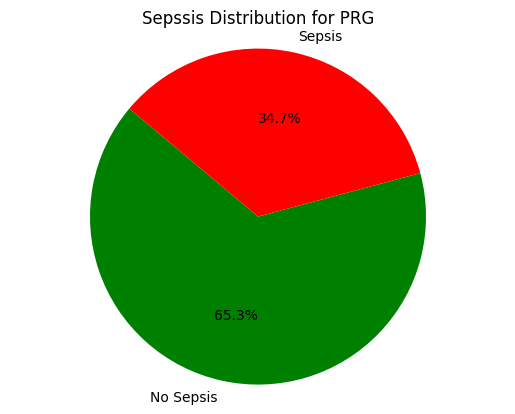

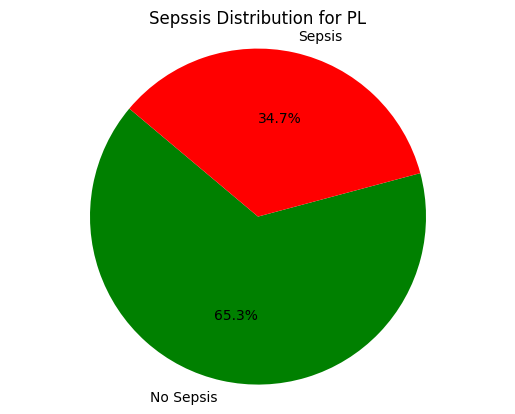

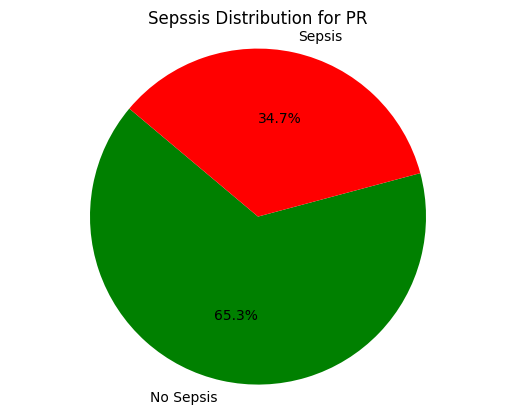

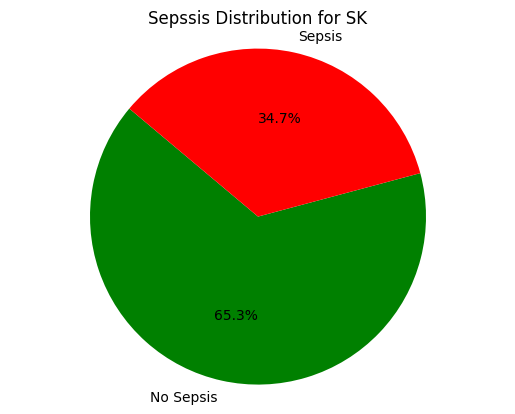

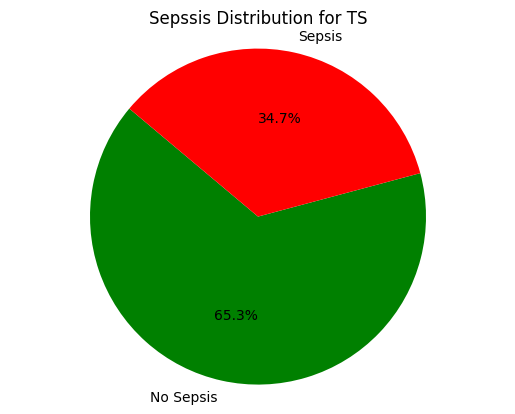

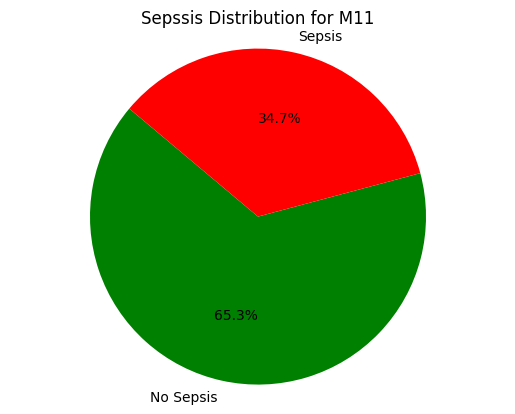

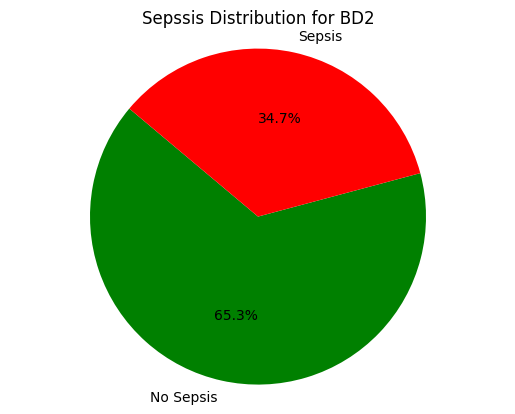

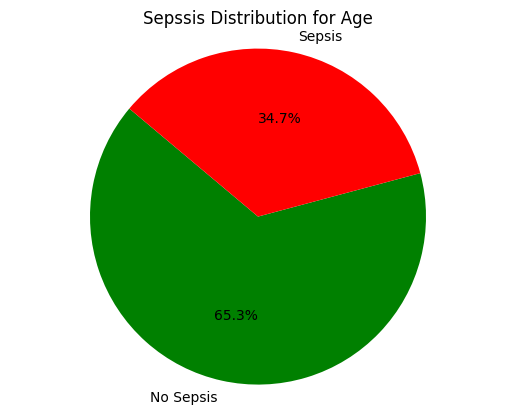

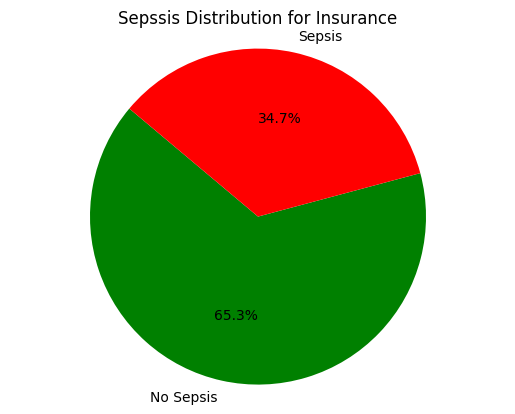

In [65]:

# Function to plot pie charts
def plot_pie_chart(feature):
    sepsis_counts = df.groupby(['Sepssis'])[feature].count()
    labels = ['No Sepsis', 'Sepsis']
    colors = ['green', 'red']
    plt.pie(sepsis_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sepssis Distribution for {feature}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
    plt.show()

# List of features to plot
features = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

# Plot pie charts for each feature
for feature in features:
    plot_pie_chart(feature)
    

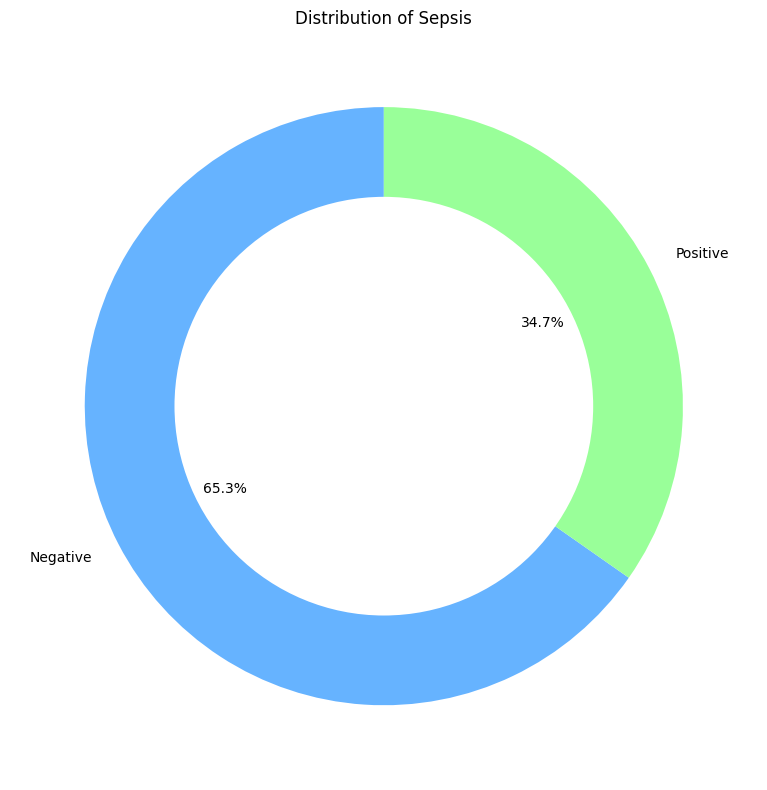

In [66]:


# Calculate value counts for Sepsis
sepsis_counts = df['Sepssis'].value_counts()

# Plotting the doughnut chart
plt.figure(figsize=(8, 8))
plt.pie(sepsis_counts, labels=sepsis_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
# Draw a circle at the center of pie to make it look like a doughnut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Sepsis')
plt.tight_layout()
plt.show()


## Hypothesis Testing and Answering Key Analytical Questions

### Hypothesis Testing

Null Hypothesis (H0): There is no significant association between the patient's age and the likelihood of sepsis.

Alternative Hypothesis (H1): There is a significant association between the patient's age and the likelihood of sepsis.

In [67]:
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [68]:

from scipy.stats import chi2_contingency



# Categorize ages into bins
age_bins = [0, 20, 40, 60, np.inf]
age_labels = ['0-20', '21-40', '41-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Create a contingency table of Age vs. Sepsis
contingency_table = pd.crosstab(df['AgeGroup'], df['Sepssis'])

# Perform the Chi-Square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p < alpha:
    print("Reject the null hypothesis")
    print("There is a significant association between age and sepsis.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no significant association between age and sepsis.")

# Print the Chi-Square statistic and p-value
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


Reject the null hypothesis
There is a significant association between age and sepsis.
Chi-Square Statistic: 30.063054308926347
P-value: 2.9640853320060214e-07


The Chi-Square test results indicate that we should reject the null hypothesis, as the p-value (approximately 2.46e-07) is significantly smaller than the chosen significance level (alpha) of 0.05. This means that there is a statistically significant association between a patient's age (in different age groups) and the likelihood of sepsis.

### Answering Key Analytical Questions
To address our key analytical objectives, we will focus on examining the interrelationships between various variables. We will utilize the Pearson Correlation coefficient, a foundational tool for quantifying the strength and direction of linear associations among these variables. Additionally, a correlation matrix will be constructed to provide a structured representation of these correlations. This matrix will offer a comprehensive view of how different medical parameters are interconnected. These critical insights, obtained from the Pearson Correlation coefficient and the correlation matrix, will empower us to discern the factors that will significantly influence the risk of sepsis.

i. Are there any correlations or patterns between the numerical features (e.g., PRG, PL, PR, SK, TS, M11, BD2, Age) and the presence of sepsis (Positive/Negative)?


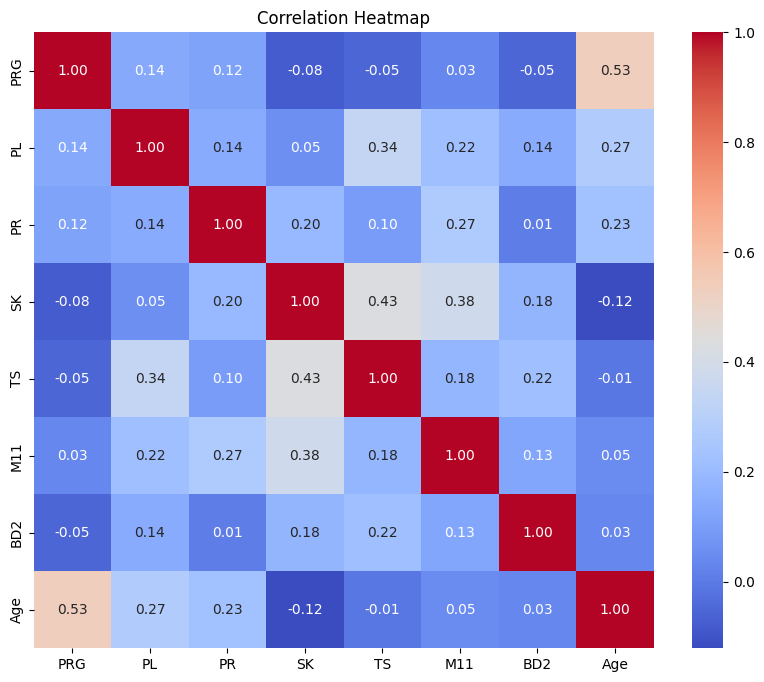

In [69]:
# Calculate the correlation matrix
corr_matrix = df[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Age and Number of Pregnancies (PRG): There is a moderately positive correlation (0.53) between the number of pregnancies (PRG) and age. This suggests that, on average, older individuals tend to have more pregnancies.

Plasma Glucose (PL) and 2-Hour Serum Insulin (TS): Plasma glucose (PL) and 2-hour serum insulin (TS) exhibit a moderate positive correlation (0.34). This correlation indicates that higher plasma glucose levels are associated with higher 2-hour serum insulin levels.

Plasma Glucose (PL) and Diastolic Blood Pressure (PR): There is a positive correlation (0.14) between plasma glucose (PL) and diastolic blood pressure (PR). This suggests that higher plasma glucose levels may be associated with higher diastolic blood pressure.

Skinfold Thickness (SK) and 2-Hour Serum Insulin (TS): Skinfold thickness (SK) and 2-hour serum insulin (TS) have a relatively strong positive correlation (0.43). This implies that individuals with higher skinfold thickness may tend to have higher 2-hour serum insulin levels.

Age and Skinfold Thickness (SK): There is a negative correlation (-0.12) between age and skinfold thickness (SK). This suggests that, on average, older individuals may have lower skinfold thickness.

Pregnancies (PRG) and Diastolic Blood Pressure (PR): The correlation between the number of pregnancies (PRG) and diastolic blood pressure (PR) is relatively low (0.12), indicating a weak positive relationship.

Age and Diabetes Pedigree Function (BD2): Age and the diabetes pedigree function (BD2) have a weak positive correlation (0.05), suggesting that age and the diabetes pedigree function are somewhat related, but the relationship is not strong.

ii. How does the distribution of key numerical variables (e.g., PR, SK, TS, M11) differ between patients with and without sepsis?

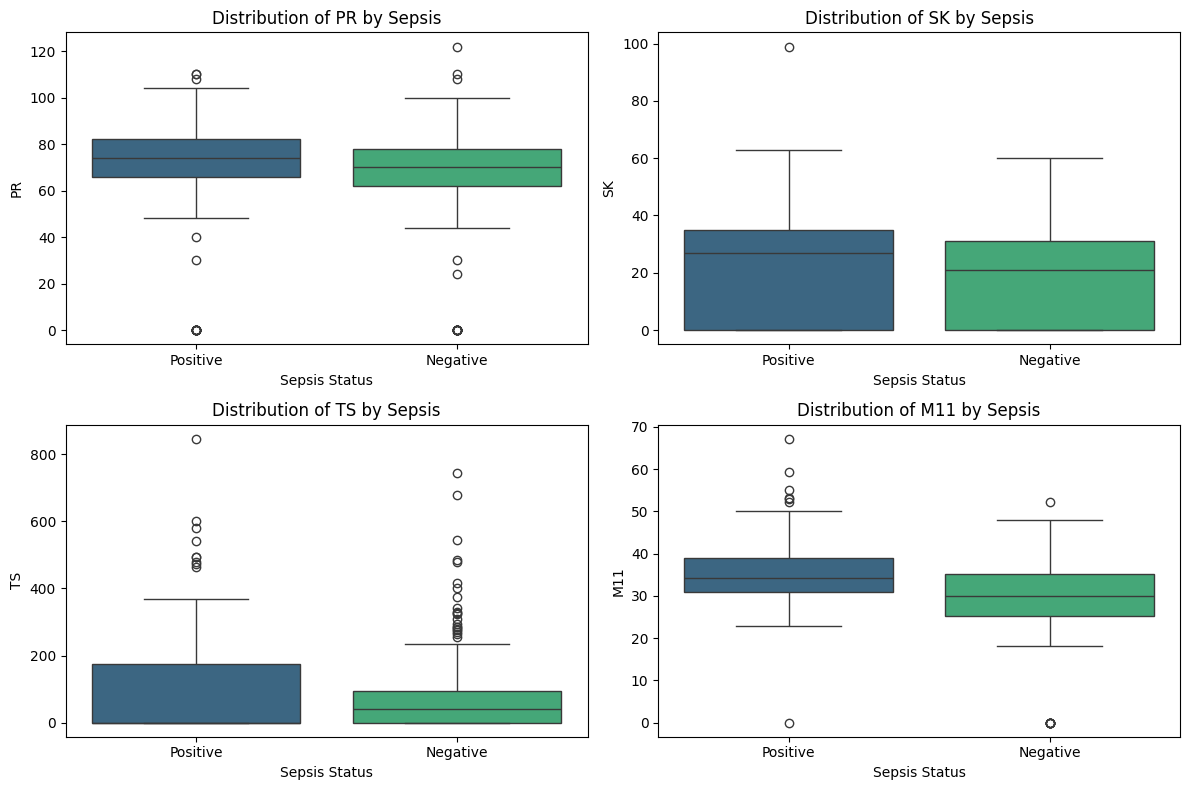

In [70]:
# Create subplots for each numerical variable
plt.figure(figsize=(12, 8))

# Define the numerical variables of interest
numerical_variables = ['PR', 'SK', 'TS', 'M11']

# Define the color palette with green and blue from the 'viridis' palette
colors = sns.color_palette('viridis', n_colors=2)

# Loop through the numerical variables and create subplots
for i, variable in enumerate(numerical_variables):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Sepssis', y=variable, data=df, hue='Sepssis', palette=colors)
    plt.title(f'Distribution of {variable} by Sepsis')
    plt.xlabel('Sepsis Status')
    plt.ylabel(variable)
    
plt.tight_layout()
plt.show()


The boxplots reveal that patients with sepsis generally have higher PR, SK, TS and M11 compared to patients without Sepsis. These differences suggest that PR, SK, TS, and BMI might be relevant factors in assessing the risk of sepsis.

iii. Is there a relationship between the number of pregnancies (PRG) and plasma glucose concentration (PL)? Does this relationship vary with the presence of sepsis?

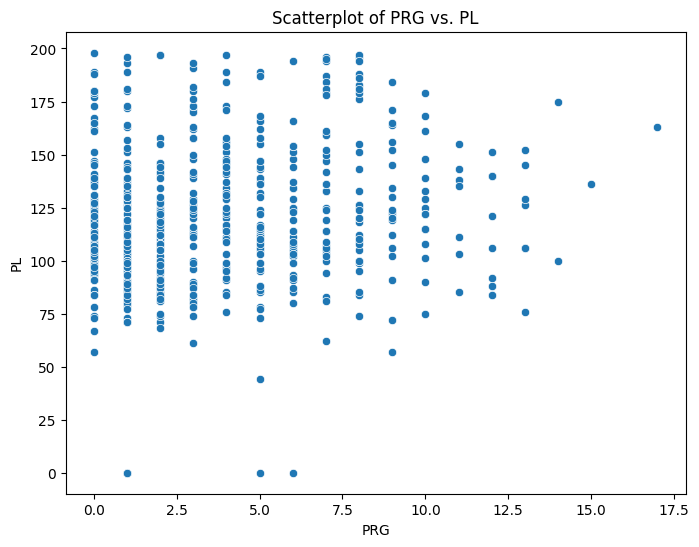

Pearson Correlation between 'PRG' and 'PL': 0.13954104835183154


In [71]:
# Select the columns of interest
scatter_data = df[['PRG', 'PL']]

# Create a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PRG', y='PL', data=scatter_data)
plt.title('Scatterplot of PRG vs. PL')
plt.xlabel('PRG')
plt.ylabel('PL')
plt.show()

# Calculate Pearson correlation
s0 = scatter_data['PRG']
s1 = scatter_data['PL']
pearson = s0.corr(s1, method='pearson')

# Print the correlation values
print(f"Pearson Correlation between 'PRG' and 'PL': {pearson}")

The Pearson correlation indicate a weak positive relationship between 'PRG' and 'PL.' While the Pearson correlation measures linear association and Spearman is non-parametric, they provide consistent results in this case, suggesting that as 'PRG' values increase, 'PL' values tend to increase, but the relationship is not particularly strong. These results are corroborated by the correlation matrix.

iv. Are there any significant differences in diastolic blood pressure (PR) between patients with different triceps skinfold thickness (SK) levels?

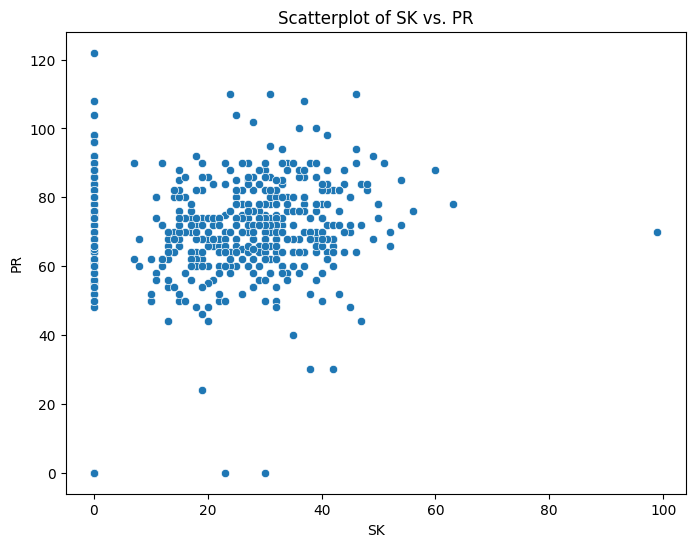

Pearson Correlation between 'PR' and 'SK': 0.1975352882024966


In [72]:
# Select the columns of interest
scatter_data = df[['PR', 'SK']]

# Create a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SK', y='PR', data=scatter_data)
plt.title('Scatterplot of SK vs. PR')
plt.xlabel('SK')
plt.ylabel('PR')
plt.show()

# Calculate Pearson correlation
s0 = scatter_data['PR']
s1 = scatter_data['SK']
pearson = s0.corr(s1, method='pearson')

# Print the correlation values
print(f"Pearson Correlation between 'PR' and 'SK': {pearson}")

Pearson Correlation between 'PR' and 'SK': 0.1975352882024966
The analysis indicates a modest positive relationship (Pearson correlation coefficient of approximately 0.198) between diastolic blood pressure (PR) and triceps skinfold thickness (SK). This suggests that as triceps skinfold thickness increases, diastolic blood pressure tends to rise slightly. Such a correlation may have potential implications for cardiovascular health, as higher triceps skinfold thickness often reflects increased subcutaneous fat. However, it's essential to recognize that the correlation is not notably strong, and its clinical significance would require further investigation and the consideration of additional health factors to draw comprehensive conclusions about the potential impact on individuals' health and well-being.

v. Does the body mass index (M11) vary significantly with 2-hour serum insulin (TS) levels?

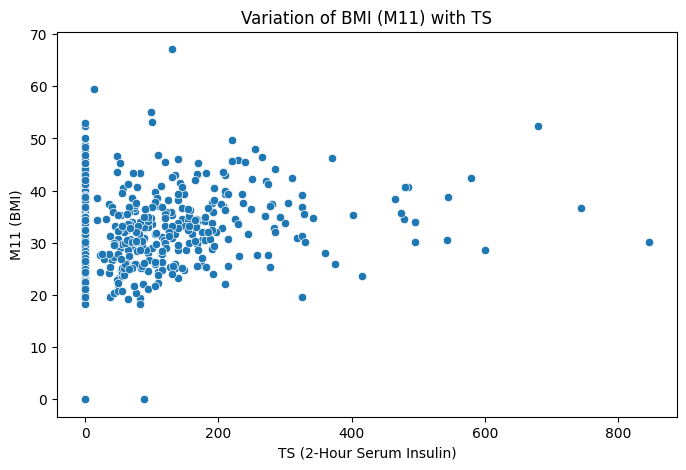

Pearson Correlation between TS and M11: 0.18474687309420654


In [73]:
# Scatterplot of M11 (BMI) vs. TS
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='TS', y='M11')
plt.xlabel('TS (2-Hour Serum Insulin)')
plt.ylabel('M11 (BMI)')
plt.title('Variation of BMI (M11) with TS')
plt.show()

# Calculate Pearson correlation
s0 = df['TS']  
s1 = df['M11']  
pearson = s0.corr(s1, method='pearson')

# Print the correlation values
print(f"Pearson Correlation between TS and M11: {pearson}")


The Pearson Correlation between 'TS' (2-Hour Serum Insulin) and 'M11' (BMI) is approximately 0.185. This indicates a weak positive linear correlation between these two variables. The correlation of 0.185 suggests that as 2-Hour Serum Insulin levels ('TS') increase, there is a slight tendency for BMI ('M11') to also increase, but the relationship is not notably strong. It's important to note that correlation does not imply causation, so while there is an association, it doesn't necessarily mean that changes in 2-Hour Serum Insulin directly cause changes in BMI.

vi. Is there a correlation between the diabetes pedigree function (BD2) and age? How does this correlation affect the likelihood of sepsis?

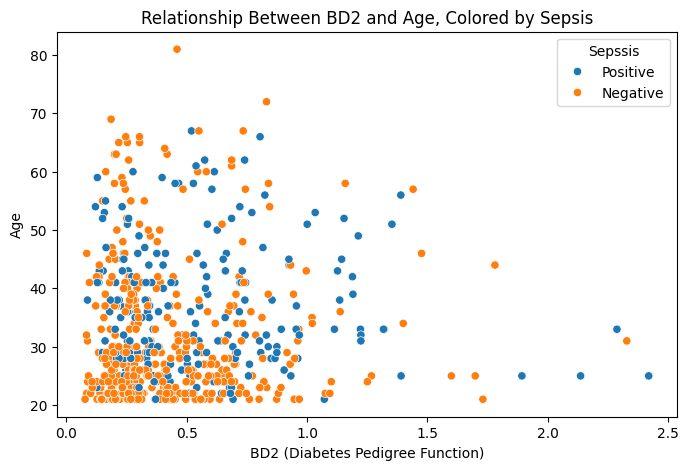

Pearson Correlation between BD2 and Age: 0.03356672354105742


In [74]:
# Create a scatterplot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='BD2', y='Age', hue='Sepssis')
plt.xlabel('BD2 (Diabetes Pedigree Function)')
plt.ylabel('Age')
plt.title('Relationship Between BD2 and Age, Colored by Sepsis')
plt.show()

# Calculate Pearson correlation between BD2 and age
pearson_correlation = df['BD2'].corr(df['Age'], method='pearson')

# Print the Pearson correlation value
print(f"Pearson Correlation between BD2 and Age: {pearson_correlation}")

The Pearson Correlation between the diabetes pedigree function (BD2), a measure of genetic diabetes susceptibility, and age is extremely weak at approximately 0.0336. This weak correlation suggests that age has minimal influence on BD2. Consequently, when considering sepsis risk solely in terms of age and its correlation with BD2, it is unlikely that age significantly affects the likelihood of sepsis based on BD2. In this specific context, the focus is on the limited relationship between age and BD2, indicating that age alone may not be a reliable predictor for sepsis risk associated with BD2. Other factors may play a more substantial role in determining sepsis risk.

vii. Are patients with insurance coverage more likely to have certain health characteristics (e.g., higher age, higher BMI) compared to those without insurance coverage?

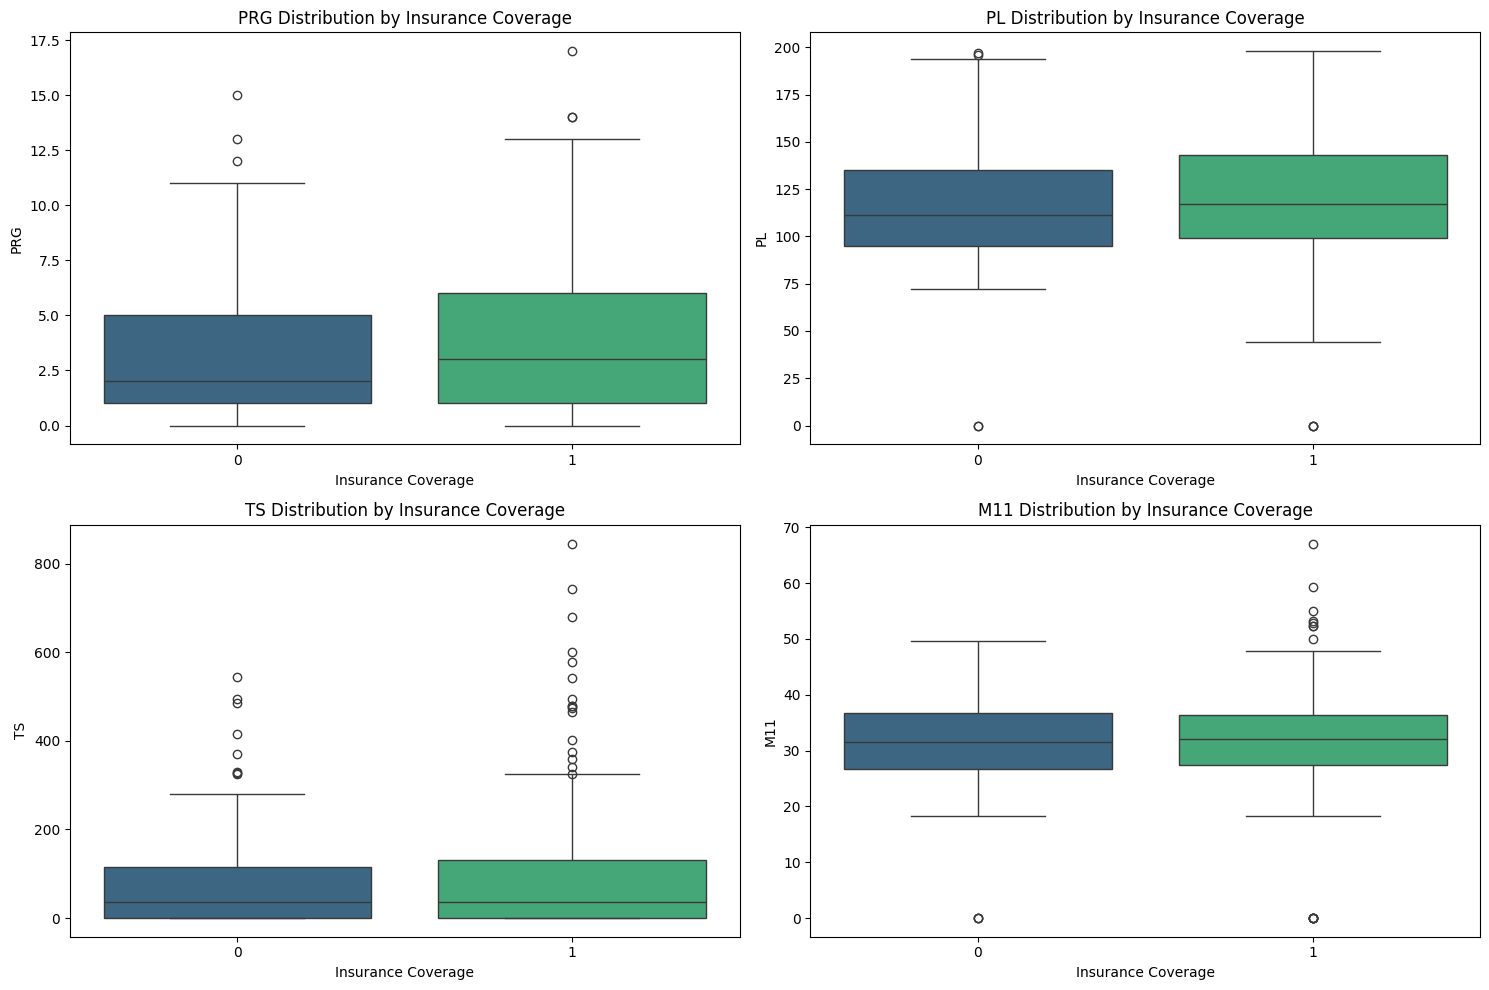

,Insurance,Mean PRG,Mean PL,Mean TS,Mean M11
0,0,3.404255,117.691489,72.303191,31.602660
1,1,4.017032,121.279805,82.734793,32.065207


In [75]:
# Numeric variables to compare
numeric_variables = ['PRG', 'PL', 'TS', 'M11']

# Create subplots for each numeric variable
plt.figure(figsize=(15, 10))
colors = sns.color_palette('viridis', n_colors=2)

for i, variable in enumerate(numeric_variables):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=df, x='Insurance', y=variable, palette=colors)
    plt.xlabel('Insurance Coverage')
    plt.ylabel(variable)
    plt.title(f'{variable} Distribution by Insurance Coverage')

plt.tight_layout()
plt.show()

# Calculate the mean for each numeric variable based on Insurance (0, 1)
mean_numeric_vs_insurance = df.groupby('Insurance')[numeric_variables].mean().reset_index()
mean_numeric_vs_insurance.columns = ['Insurance'] + [f'Mean {var}' for var in numeric_variables]

# Display the DataFrame
mean_numeric_vs_insurance

The boxplots and mean values based on insurance coverage provide valuable insights into the relationship between insurance status and various health characteristics. Here are detailed insights for each of the numeric variables:

Mean PRG (Number of Pregnancies): Patients with insurance coverage (Insurance=1) exhibit a slightly higher mean number of pregnancies (approximately 4.02) compared to patients without insurance (Insurance=0) with a mean of approximately 3.40. This suggests that individuals with insurance might be more likely to have a slightly higher number of pregnancies.

Mean PL (Plasma Glucose): Patients with insurance coverage tend to have a slightly higher mean plasma glucose level (approximately 121.28) compared to patients without insurance (mean of approximately 117.69). This implies that individuals with insurance coverage may be more likely to have a slightly elevated plasma glucose level.

Mean TS (2-Hour Serum Insulin): Patients with insurance coverage exhibit a notably higher mean 2-hour serum insulin level (approximately 82.73) in comparison to patients without insurance (mean of approximately 72.30). This suggests that individuals with insurance are more likely to have a higher 2-hour serum insulin level.

Mean M11 (BMI - Body Mass Index): Patients with insurance coverage also demonstrate a slightly higher mean BMI (approximately 32.07) when compared to patients without insurance (mean of approximately 31.60). This implies that individuals with insurance may be more likely to have a slightly higher BMI.

These insights collectively indicate that patients with insurance coverage may have certain health characteristics, such as higher numbers of pregnancies, elevated plasma glucose levels, higher 2-hour serum insulin levels, and slightly higher BMI.

## Data preparation

### Handle missing values

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         599 non-null    object  
 1   PRG        599 non-null    int64   
 2   PL         599 non-null    int64   
 3   PR         599 non-null    int64   
 4   SK         599 non-null    int64   
 5   TS         599 non-null    int64   
 6   M11        599 non-null    float64 
 7   BD2        599 non-null    float64 
 8   Age        599 non-null    int64   
 9   Insurance  599 non-null    int64   
 10  Sepssis    599 non-null    object  
 11  AgeGroup   599 non-null    category
dtypes: category(1), float64(2), int64(7), object(2)
memory usage: 52.4+ KB


In [77]:
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,AgeGroup
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,41-60
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,21-40
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,21-40
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,21-40
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,21-40


In [78]:
train_df = df.copy()

In [79]:
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,AgeGroup
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,41-60
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,21-40
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,21-40
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,21-40
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,21-40


In [80]:
train_df.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,AgeGroup
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,41-60
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,21-40
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,21-40
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,21-40
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,21-40


In [81]:
train_df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
AgeGroup     0
dtype: int64

### Key Insights
1. No Missing values
2. All features apart from ID are positivelive correlated to Sepsis 
3. Data is imbalanced
4. From the correlation matrix All features apart from ID are valid for sepsis prediction models



In [82]:
train_df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,AgeGroup
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,41-60
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,21-40
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,21-40
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,21-40
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,21-40


In [83]:
# Assuming train_df is your DataFrame containing the 'Insurance' column
train_df['Insurance'] = train_df['Insurance'].map({'valid': 1, 'invalid': 0})


In [84]:
train_df = train_df.drop(columns=['ID'])

In [85]:
train_df.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,NaN,Positive,41-60
1,1,85,66,29,0,26.6,0.351,31,NaN,Negative,21-40
2,8,183,64,0,0,23.3,0.672,32,NaN,Positive,21-40
3,1,89,66,23,94,28.1,0.167,21,NaN,Negative,21-40
4,0,137,40,35,168,43.1,2.288,33,NaN,Positive,21-40


#### Split Data into Training and Evaluation sets

In [86]:
# Assign the dataset to X and y variables. y being the target variable and X being the features (input)
X = train_df.drop('Sepssis', axis=1)
y = train_df['Sepssis']

In [87]:
#Split X and y dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

In [88]:
# Define numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [89]:
num_cols

['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']

In [90]:
cat_cols

[]

In [91]:
# Use label encoder to encode the target variables into 1(Yes) and 0(No)
encoder = LabelEncoder()

In [92]:
#Fit transforn the y train (Fit_transform instructs the model to learn and transform)
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [93]:


# Define preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),  # Impute missing values with the mean
    ('num_scaler', MinMaxScaler())  # Scale features to a range
])

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with mode
    ('cat_encoder', LabelEncoder())  # Encode categorical variables
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

### Models with pipelines

In [94]:

# List of models with pipelines
models = [
    ('Logistic_regression', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', LogisticRegression(random_state=42))
    ])),
    ('Decision_tree', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])),
    ('Random_forest', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])),
    ('Support_vector', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', SVC(random_state=42, probability=True))  # Enable probability estimates for AUC
    ])),
    ('KNN', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', KNeighborsClassifier(n_neighbors=5))
    ])),
    ('Gradient_boost', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])),
]

In [95]:









# Create dictionaries to store pipelines and confusion matrices
all_pipelines = {}
all_confusion_matrix = {}

# DataFrame to store metrics
metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'auc'])

# Assuming y_train_encoded, y_test_encoded are already defined from LabelEncoder
# Create and evaluate pipelines
for model_name, classifier in models:
    final_pipeline = classifier

    # Fit data to pipeline
    final_pipeline.fit(X_train, y_train)

    # Store the pipeline in the dictionary
    all_pipelines[model_name] = final_pipeline

    # Predict on the test set
    y_pred = final_pipeline.predict(X_test)
    
    # Predict probabilities for AUC calculation (only works for classifiers with probability=True)
    if hasattr(final_pipeline['classifier'], 'predict_proba'):
        y_prob = final_pipeline.predict_proba(X_test)[:, 1]
    else:
        y_prob = None
    
    # Calculate AUC if probabilities are available
    if y_prob is not None:
        auc_score = roc_auc_score(y_test, y_prob)
    else:
        auc_score = None

    # Generate classification report
    metrics = classification_report(y_test, y_pred, output_dict=True)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    all_confusion_matrix[model_name] = conf_matrix

    # Extract metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    # Append metrics to the DataFrame using pd.concat
    metrics_table = pd.concat([metrics_table, pd.DataFrame([{
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'auc': auc_score
    }])], ignore_index=True)

# Display metrics for all models in descending order of f1_score
metrics_table_sorted = metrics_table.sort_values(by='f1_score', ascending=False)
print(metrics_table_sorted)

            model_name  accuracy  precision    recall  f1_score       auc
0  Logistic_regression  0.750000   0.769796  0.750000  0.754736  0.820106
5       Gradient_boost  0.750000   0.760417  0.750000  0.753333  0.797314
2        Random_forest  0.750000   0.747500  0.750000  0.748533  0.812644
3       Support_vector  0.727778   0.759375  0.727778  0.733803  0.822548
4                  KNN  0.700000   0.716000  0.700000  0.704935  0.752612
1        Decision_tree  0.677778   0.680201  0.677778  0.678906  0.649573


In [96]:
all_pipelines

{'Logistic_regression': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('num_imputer',
                                                                    SimpleImputer()),
                                                                   ('num_scaler',
                                                                    MinMaxScaler())]),
                                                   ['PRG', 'PL', 'PR', 'SK',
                                                    'TS', 'M11', 'BD2', 'Age',
                                                    'Insurance']),
                                                  ('cat',
                                                   Pipeline(steps=[('cat_imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('cat_

### Visualize each pipeline

In [97]:
from sklearn import set_config

# Set the display option to plot the pipeline
set_config(display='diagram')

# Visualize each pipeline
for model_name, pipeline in all_pipelines.items():
    print(f"Pipeline for {model_name}:")
    display(pipeline)

Pipeline for Logistic_regression:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2', 'Age',
                                                   'Insurance']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('over_sampler', RandomOverSampler(random_state=42)),
                ('classifier', LogisticRegression(random_state=42))])

Pipeline for Decision_tree:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2', 'Age',
                                                   'Insurance']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('over_sampler', RandomOverSampler(random_state=42)),
                ('classifier', DecisionTreeClassifier(random_state=42))])

Pipeline for Random_forest:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2', 'Age',
                                                   'Insurance']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('over_sampler', RandomOverSampler(random_state=42)),
                ('classifier', RandomForestClassifier(random_state=42))])

Pipeline for Support_vector:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2', 'Age',
                                                   'Insurance']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('over_sampler', RandomOverSampler(random_state=42)),
                ('classifier', SVC(probability=True, random_state=42))])

Pipeline for KNN:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2', 'Age',
                                                   'Insurance']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('over_sampler', RandomOverSampler(random_state=42)),
                ('classifier', KNeighborsClassifier())])

Pipeline for Gradient_boost:


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['PRG', 'PL', 'PR', 'SK',
                                                   'TS', 'M11', 'BD2', 'Age',
                                                   'Insurance']),
                                                 ('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   LabelEncoder())]),
                                                  [])])),
                ('over_sampler', RandomOverSampler(random_state=42)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

### Save Encoder

In [98]:
# Save the encoder to a file
encoder_filename = 'encoder.joblib'
joblib.dump(encoder, encoder_filename)
print(f"Encoder saved to '{encoder_filename}'")

Encoder saved to 'encoder.joblib'


### Fine Tuning Models

In [99]:


# Define preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Logistic_regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    },
    'Decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30, 40, 50],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Random_forest': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_features': ['auto', 'sqrt', 'log2'],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Support_vector': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'classifier__gamma': ['scale', 'auto']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'Gradient_boost': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'classifier__max_depth': [3, 5, 7, 9],
        'classifier__subsample': [0.7, 0.8, 0.9, 1.0]
    }
}

# List of models with pipelines
models = [
    ('Logistic_regression', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', LogisticRegression(random_state=42))
    ])),
    ('Decision_tree', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])),
    ('Random_forest', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', RandomForestClassifier(random_state=42))
    ])),
    ('Support_vector', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', SVC(random_state=42, probability=True))  # Enable probability estimates for AUC
    ])),
    ('KNN', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', KNeighborsClassifier(n_neighbors=5))
    ])),
    ('Gradient_boost', ImbPipeline([
        ('preprocessor', preprocessor),
        ('over_sampler', RandomOverSampler(random_state=42)),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ])),
]

# Create dictionaries to store pipelines and confusion matrices
all_pipelines = {}
all_confusion_matrix = {}

# DataFrame to store metrics
metrics_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score', 'auc'])

# Directory to save pipelines
pipeline_directory = "trained_pipelines"
os.makedirs(pipeline_directory, exist_ok=True)

# Create and evaluate pipelines with hyperparameter tuning
for model_name, classifier in models:
    # Define RandomizedSearchCV
    random_search = RandomizedSearchCV(classifier, param_distributions=param_grids[model_name], 
                                       n_iter=10, cv=3, scoring='f1', n_jobs=-1, random_state=42)
    
    # Fit data to pipeline
    random_search.fit(X_train, y_train_encoded)
    
    # Get the best estimator
    best_pipeline = random_search.best_estimator_

    # Store the pipeline in the dictionary
    all_pipelines[model_name] = best_pipeline

    # Predict on the test set
    y_pred = best_pipeline.predict(X_test)
    
    # Predict probabilities for AUC calculation (only works for classifiers with probability=True)
    if hasattr(best_pipeline['classifier'], 'predict_proba'):
        y_prob = best_pipeline.predict_proba(X_test)[:, 1]
    else:
        y_prob = None
    
    # Calculate AUC if probabilities are available
    if y_prob is not None:
        auc_score = roc_auc_score(y_test_encoded, y_prob)
    else:
        auc_score = None

    # Generate classification report
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)
    all_confusion_matrix[model_name] = conf_matrix

    # Extract metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score = metrics['weighted avg']['f1-score']

    # Append metrics to the DataFrame using pd.concat
    metrics_table = pd.concat([metrics_table, pd.DataFrame([{
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'auc': auc_score
    }])], ignore_index=True)
    
    # Save the pipeline for each model
    pipeline_filename = os.path.join(pipeline_directory, f"{model_name}_pipeline.joblib")
    dump(best_pipeline, pipeline_filename)
    print(f"{model_name} pipeline saved to {pipeline_filename}")

# Display metrics for all models in descending order of f1_score
metrics_table_sorted = metrics_table.sort_values(by='f1_score', ascending=False)
print(metrics_table_sorted)


Logistic_regression pipeline saved to trained_pipelines\Logistic_regression_pipeline.joblib
Decision_tree pipeline saved to trained_pipelines\Decision_tree_pipeline.joblib
Random_forest pipeline saved to trained_pipelines\Random_forest_pipeline.joblib
Support_vector pipeline saved to trained_pipelines\Support_vector_pipeline.joblib
KNN pipeline saved to trained_pipelines\KNN_pipeline.joblib
Gradient_boost pipeline saved to trained_pipelines\Gradient_boost_pipeline.joblib
            model_name  accuracy  precision    recall  f1_score       auc
2        Random_forest  0.750000   0.757727  0.750000  0.752724  0.820784
5       Gradient_boost  0.744444   0.769809  0.744444  0.749769  0.818071
3       Support_vector  0.727778   0.759375  0.727778  0.733803  0.822548
0  Logistic_regression  0.716667   0.744487  0.716667  0.722711  0.813187
1        Decision_tree  0.711111   0.723800  0.711111  0.715284  0.734364
4                  KNN  0.705556   0.726357  0.705556  0.711134  0.759056


### Save the models

In [100]:
# Create directory for saving models if it doesn't exist
models_directory = 'trained_models/'
if not os.path.exists(models_directory):
    os.makedirs(models_directory)

# Save each pipeline
for model_name, pipeline in all_pipelines.items():
    filename = models_directory + model_name + ".joblib"
    joblib.dump(pipeline, filename)
    print(f"Model '{model_name}' saved to '{filename}'")

Model 'Logistic_regression' saved to 'trained_models/Logistic_regression.joblib'
Model 'Decision_tree' saved to 'trained_models/Decision_tree.joblib'
Model 'Random_forest' saved to 'trained_models/Random_forest.joblib'
Model 'Support_vector' saved to 'trained_models/Support_vector.joblib'
Model 'KNN' saved to 'trained_models/KNN.joblib'
Model 'Gradient_boost' saved to 'trained_models/Gradient_boost.joblib'


### Save the pipeline

In [101]:


# Define the directory to save the pipeline
pipeline_directory = "trained_pipeline/"

# Create the directory if it doesn't exist
os.makedirs(pipeline_directory, exist_ok=True)

# Save the entire pipeline
pipeline_filename = os.path.join(pipeline_directory, "full_pipeline.joblib")

# Assuming you have a pipeline object 'final_pipeline'

dump(final_pipeline, pipeline_filename)

print(f"Pipeline saved to {pipeline_filename}")


Pipeline saved to trained_pipeline/full_pipeline.joblib
